In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
df=pd.read_csv("/Users/sabaresh/Documents/info visualisation/WHO-COVID-19-global-data.csv")
df.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0


In [9]:
pd.isnull(df).sum()

Date_reported           0
Country_code         1146
Country                 0
WHO_region              0
New_cases               0
Cumulative_cases        0
New_deaths              0
Cumulative_deaths       0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271602 entries, 0 to 271601
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Date_reported      271602 non-null  object
 1   Country_code       270456 non-null  object
 2   Country            271602 non-null  object
 3   WHO_region         271602 non-null  object
 4   New_cases          271602 non-null  int64 
 5   Cumulative_cases   271602 non-null  int64 
 6   New_deaths         271602 non-null  int64 
 7   Cumulative_deaths  271602 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 16.6+ MB


In [12]:
sort_df=df.sort_values('New_cases',ascending=False).head(10)
sort_df

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
49217,2022-12-23,CN,China,WPRO,6966046,50447985,628,34588
49216,2022-12-22,CN,China,WPRO,6434648,43481939,454,33960
49218,2022-12-24,CN,China,WPRO,6327801,56775786,836,35424
49215,2022-12-21,CN,China,WPRO,5905312,37047291,360,33506
49219,2022-12-25,CN,China,WPRO,5669864,62445650,894,36318
49214,2022-12-20,CN,China,WPRO,5102957,31141979,315,33146
49220,2022-12-26,CN,China,WPRO,4768272,67213922,1308,37626
49221,2022-12-27,CN,China,WPRO,4462481,71676403,1369,38995
49222,2022-12-28,CN,China,WPRO,4356772,76033175,1394,40389
49213,2022-12-19,CN,China,WPRO,4068849,26039022,295,32831


In [13]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
New_cases,271602.0,2.788140e+03,4.001288e+04,-30574.0,0.0,14.0,397.00,6966046.0
Cumulative_cases,271602.0,1.140528e+06,5.382975e+06,0.0,1118.0,25165.0,312948.25,101752396.0
New_deaths,271602.0,2.522291e+01,1.476512e+02,-2437.0,0.0,0.0,4.00,11447.0
Cumulative_deaths,271602.0,1.585335e+04,6.889940e+04,0.0,11.0,302.0,4631.00,1106783.0


In [14]:
most_affected=df.query('New_cases>100000',inplace=False).sort_values('New_cases',ascending=False)
most_affected[:10]

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
49217,2022-12-23,CN,China,WPRO,6966046,50447985,628,34588
49216,2022-12-22,CN,China,WPRO,6434648,43481939,454,33960
49218,2022-12-24,CN,China,WPRO,6327801,56775786,836,35424
49215,2022-12-21,CN,China,WPRO,5905312,37047291,360,33506
49219,2022-12-25,CN,China,WPRO,5669864,62445650,894,36318
49214,2022-12-20,CN,China,WPRO,5102957,31141979,315,33146
49220,2022-12-26,CN,China,WPRO,4768272,67213922,1308,37626
49221,2022-12-27,CN,China,WPRO,4462481,71676403,1369,38995
49222,2022-12-28,CN,China,WPRO,4356772,76033175,1394,40389
49213,2022-12-19,CN,China,WPRO,4068849,26039022,295,32831


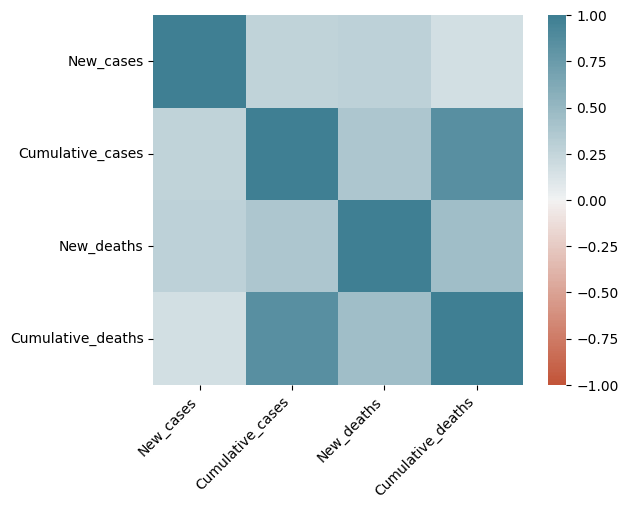

In [20]:
corr = df.corr(numeric_only = True)
ax = sns.heatmap(
corr,
vmin=-1, vmax=1, center=0,
cmap=sns.diverging_palette(20, 220, n=200),
square=True
)
ax.set_xticklabels(
ax.get_xticklabels(),
rotation=45,
horizontalalignment='right'
);

In [21]:
sample_df=df.sample(int(0.004*len(df)))
print(len(sample_df))

1086


[Text(0.5, 1.0, 'New_cases vs New_deaths')]

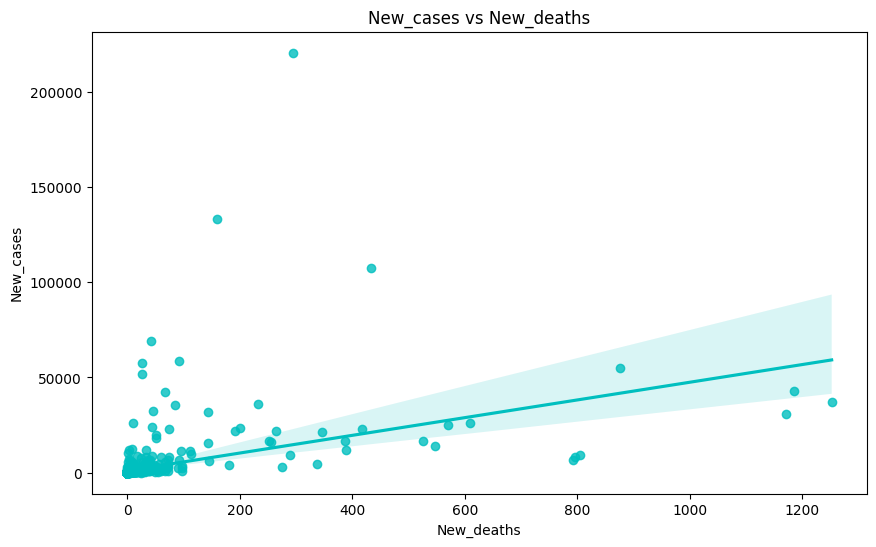

In [24]:
plt.figure(figsize=(10,6))
sns.regplot(data=sample_df,y="New_cases",x="New_deaths",color="c").set(title="New_cases vs New_deaths")

[Text(0.5, 1.0, 'Cumulative_cases vs Cumulative_deaths')]

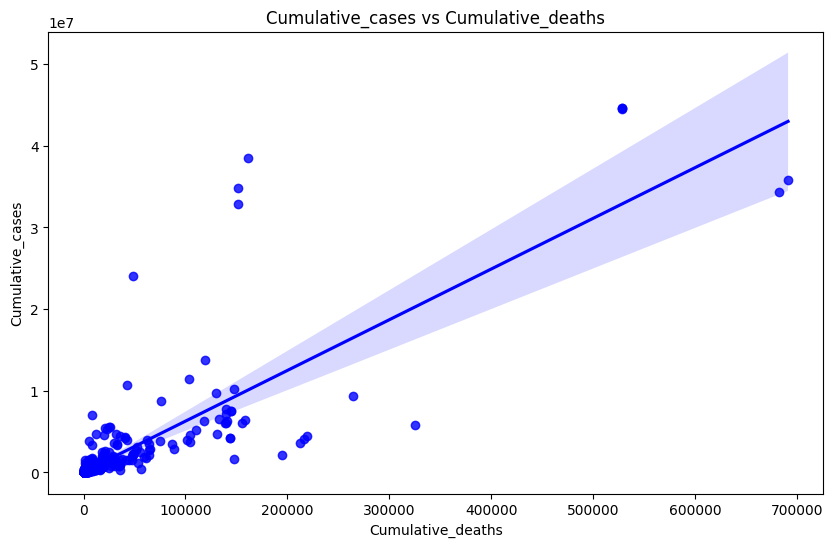

In [25]:
plt.figure(figsize=(10,6))
sns.regplot(data=sample_df,y="Cumulative_cases",x="Cumulative_deaths",color="b").set(title="Cumulative_cases vs Cumulative_deaths")

In [43]:
df['Dates']=df.index.get_level_values('Date_reported')
df.Dates=pd.to_datetime(df.Dates)
years=df.Dates.dt.year

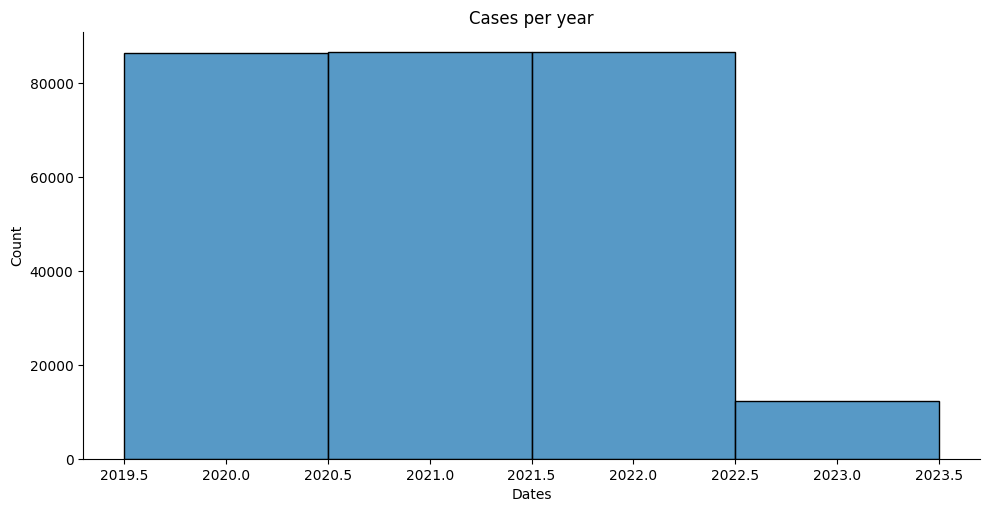

In [35]:
sns.displot(years,discrete=True,aspect=2,height=5,kind="hist").set(title="Cases per year")